<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           📥️ Imports
</h1>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           🛠️ Create a Simple CNN
</h1>
</div>

In [2]:
class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN, self).__init__()
        # the out_channels=8 means total number of kernels(filters) that I am applying on the input_image
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=(1,1), padding=(1,1)) # same convolution
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(16*7*7, num_classes)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))       # 1x28x28 --> 8x28x28 --> because same convolution
        x = self.pool(x)                # 8x14x14
        x = F.relu(self.conv2(x))       # 16x14x14
        x = self.pool(x)                # 16x7x7
        x = x.reshape(x.shape[0], -1)   # 16x49
        x = self.fc1(x)
        return x

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           ✅ Set device
</h1>
</div>

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           ✏️ Set Hyperparameters
</h1>
</div>

In [4]:
IN_CHANNELS = 1
NUM_CLASSES = 10
LEARNING_RATE = 0.001
BATCH_SIZE = 64
NUM_EPOCHS = 5

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           ⏬ Load the Data
</h1>
</div>

In [5]:
train_dataset = datasets.MNIST(root='kaggle/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataset = datasets.MNIST(root='kaggle/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           Now let's look at some examples of test data (batch size passed is 64)
</h1>
</div>

In [6]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples) # returns 1st element of iteration

example_data.shape

torch.Size([64, 1, 28, 28])

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
    
<ul>
    <li style="color: white;
               font-size: 13px;
               margin-top: 11px;">
            So we have batch size of 64 images of 28x28 pixels in grayscale(i.e no RGB channel hence the 1)
    </li>
</ul>
    
</div>

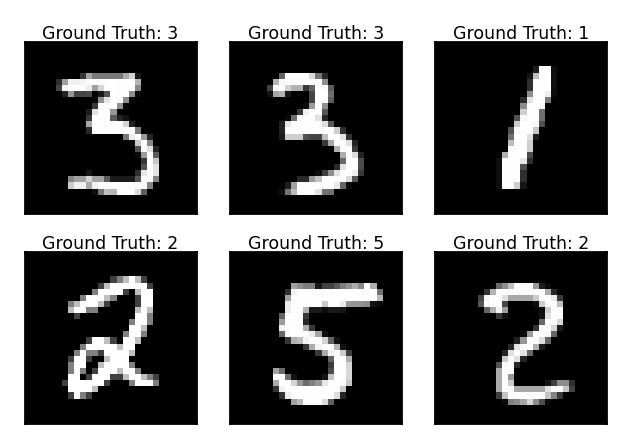

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3,2), dpi=250)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(label=f"Ground Truth: {example_targets[i]}",
              fontsize=5,
              pad=1.0)
    plt.xticks(ticks=[]) # passing an empty list removes all x_ticks
    plt.yticks(ticks=[])
    
plt.show()

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           ⚒️ Let's create an instance of our model
</h1>
</div>

In [8]:
model = CNN().to(device=device)
x = torch.randn(64, 1, 28, 28).to(device=device)
print(x.shape)
print(model(x).shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 10])


<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           🖍️ Define the Loss and Optimizer
</h1>
</div>

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           💪🏼 Train the Network
</h1>
</div>

In [10]:
for epoch in range(NUM_EPOCHS):
    for batch_idx, (data, targets) in enumerate(train_loader):
        
        """
        Get the data to CUDA if possible,
        because they are tensors and that is why can be processed on CUDA(GPU) more efficiently.
        """
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Perform the Forward Pass
        scores = model(data)
        loss = criterion(scores, targets)
        
        # Carry out the Gradient of Loss with respect to all Parameters(weights and biases) in model
        """Zeroing the gradients computed, because if gradients are not cleared,
        they would accumulate over multiple batches, resulting in incorrect parameters update and
        accumulation would cause the gradients to grow larger and potentially lead to 
        UNSTABLE TRAINING or SLOWER CONVERGENCE"""
        optimizer.zero_grad()
        loss.backward()
        
        # Now Perform the Back Propagation using the derived Gradient
        optimizer.step()

print("Model Trained")

Model Trained


# 
<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           ✔️ Check accuracy on Training and Test to see how good our model is...
</h1>
</div>

In [11]:
train_loader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: kaggle/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")
        
    """To keep track of number of correctly predicted samples and total number of samples"""
    num_correct = 0
    num_samples = 0
    model.eval()  # This disables certain layers such as Dropout or BatchNorm that behaves differently during training and evaluation.
    
    """
    torch.no_grad() is a context manager that is used to disable gradient tracking,
    as now we are in evaluation phase so no need to upgrad the gradients.
    """
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)   # asking to load on CUDA as they are tensors
            y = y.to(device=device)
            
            scores = model(x)  # scores represents model's predictions for each class
            
            """
            scores.max(dim=1) means it finds the index of the highest-scoring class prediction for each sample in the batch."""
            _, predictions = scores.max(dim=1)
            
            num_correct += (predictions == y).sum()    # comparing predictions with true target values and 
            
            """
            predictions.size(0) implies the 0th dimension when printing predictions.shape,
            it will return torch.Tensor([64]), which is the batch-size of images
            """
            num_samples += predictions.size(0)   
            
        print(f"Got {num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
        
    model.train()
    
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 58856/60000 with accuracy 98.09
Checking accuracy on test data
Got 9815/10000 with accuracy 98.15


<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           💁🏼 Hence we got 98.15% accuracy(TEST DATA) on MNIST dataset using Convolutional Neural Network with just 5 Epochs On Cuda
</h1>
</div>

<div style="background-color: white;
            border-radius: 7px;
            border-style: solid;">
    
<h1 style="text-align: center;
           font-size: 30px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
           If you find this notebook helpful, consider upvoting it :)
</h1>
</div>